# DESEMPLEO POR GÉNERO

Antonio Payar Sánchez


---



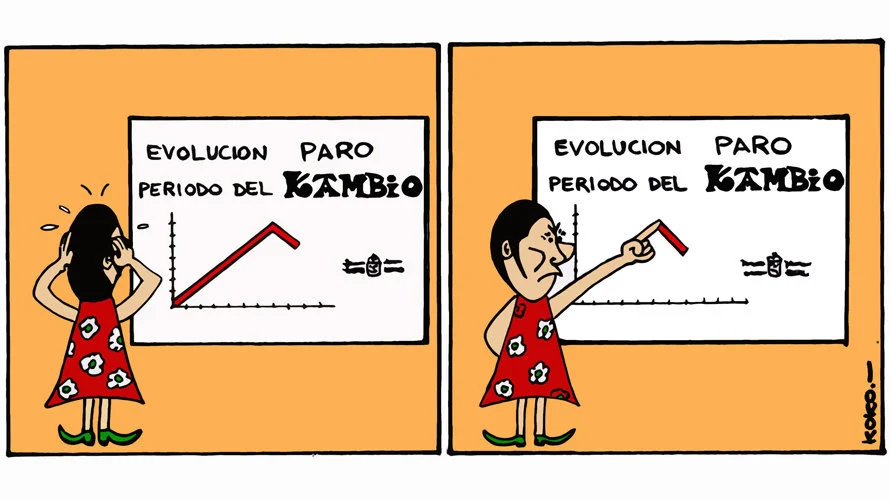


El desempleo es uno de los criterios directos que se utilizan para evaluar
no solo países sino modelos económicos e incluso culturas.
Ya que en el anterior trabajo también abordé un tema similar a nivel de complejidad como es la inmigración, en este último trabajo he decidido abordar no solo el desempleo sino también cómo afecta éste dependiendo del género.


Para ello he decidido utilizar los datos que proporciona el Banco Mundial de 4 tipos diferentes:

*   Desempleo varones dentro de la población activa
*   Desempleo mujeres dentro de la población activa.

*   Desempleo varones jóvenes dentro de la población activa.
*   Desempleo mujeres jóvenes dentro de la población activa.


Dado que el Banco Mundial proporciona los datos en formato csv o Excel he convertido dos de ellos a parquet para cumplir con los criterios de la entrega.

También quiero aclarar que los datos no estaban del todo bien.He tenido que aplicar varias formas de preprocesamiento para eliminar al máximo el contenido que no quería y algunos datos estables como tal estaban hasta el 2021 por lo que he decidido eliminar los últimos años.

De nuevo he utilizado la herramienta de Adobe a la hora de seleccionar los colores a utilizar y dado que la mayor parte de las comparaciones son por género, he decidido utilizar los colores más conservadores para estos casos.

Principalmente porque es prácticamente un estándar para la mayor parte de este tipo de gráficos.

También he intentado hacer que los gráficos sean lo más interactivos y la mayor parte de las comparaciones para el Historytelling las he hecho con España pero el usuario tiene la posibilidad de trabajar con cualquier país que le apetezca.


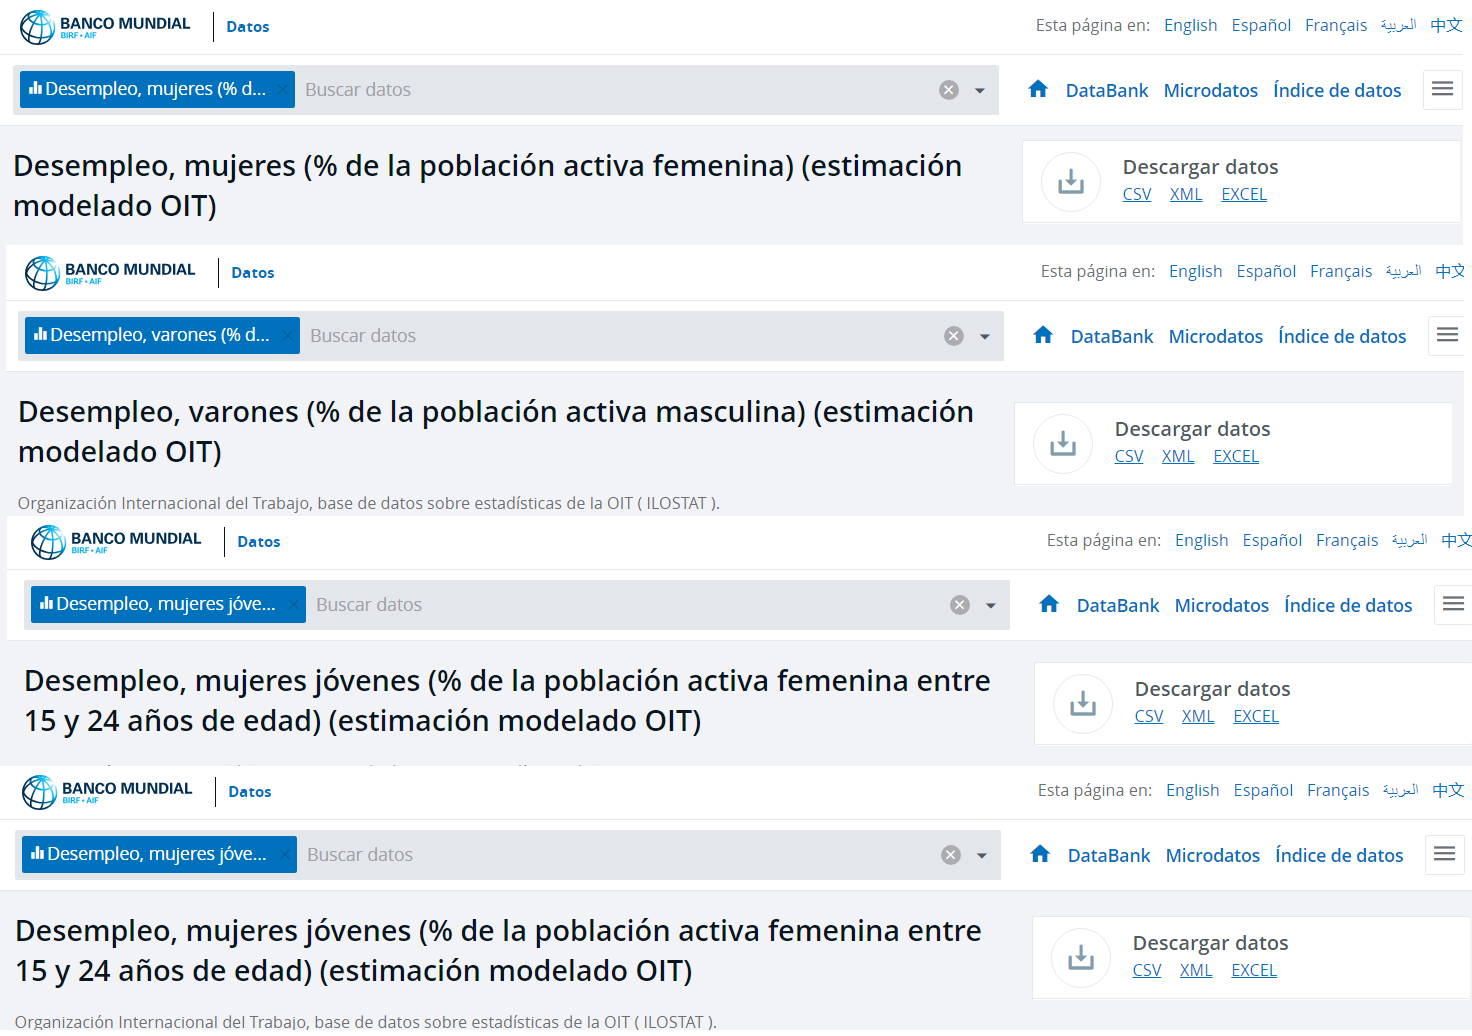

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Checkbox
import pandas as pd
import numpy as np

In [ ]:
df_desempleo_h_jóvenes = pd.read_csv('/content/API_SL.UEM.1524.MA.ZS_DS2_es_csv_v2_147722.csv', delimiter=',', header=0)
df_desempleo_h = pd.read_csv('/content/API_SL.UEM.TOTL.MA.ZS_DS2_es_csv_v2_85347.csv', delimiter=',', header=0)

df_desempleo_m = pd.read_parquet('/content/desempleo_m.parquet')
df_desempleo_m_jóvenes = pd.read_parquet('/content/desempleo_m_jóvenes.parquet')

In [ ]:
def preprocesamiento_basico(df,lista_paises):
  #Eliminamos las 3 primeras columnas
  df = df.drop(df.columns[[1, 2, 3]], axis=1)
  #Quitamos todas las filas donde no haya null en la columna Contry Name
  df = df.dropna(subset=['Country Name'])

  #Eliminamos ese rango de años dado que no hay datos
  for year in range(1960, 1991):
    df = df.drop(columns=[str(year)])

  # Eliminamos la 1º columna
  df = df.dropna(subset=[df.columns[1]])
  #Eliminamos las ultimas 3 columnas
  df = df.iloc[:, :-3]

  #Eliminamos todas las filas donde su contenido no nos interese
  df = df[~df['Country Name'].isin(lista_paises)]

  return df

In [ ]:
lista_paises = ["Países menos desarrollados: clasificación de las Naciones Unidas",
                "Países de ingreso bajo",
                "Países de ingreso mediano bajo",
                "Ingreso mediano y bajo",
                "avanzada del dividendo demográfico",
                "Oriente Medio y Norte de África (excluido altos ingresos)",
                "Otros Estados pequeos",
                "previa al dividendo demográfico",
                "Estados pequeos de las Islas del Pacfico",
                "posterior al dividendo demográfico",
                "África al sur del Sahara (excluido altos ingresos)",
                "Pequeños Estados",
                "Asia oriental y el Pacífico (BIRF y la AIF)",
                "Europa y Asia central (BIRF y la AIF)",
                "América Latina y el Caribe (BIRF y la AIF)",
                "Oriente Medio y Norte de África (BIRF y la AIF)",
                "Asia meridional (BIRF y la AIF)",
                "África al sur del Sahara (BIRF y la AIF)",
                "Ingreso mediano alto",
                "Miembros OCDE",
                "Ingreso mediano",
                "Sólo AIF",
                "BIRF y la AIF",
                "total de la AIF",
                "mezcla de la AIF",
                "Países pobres muy endeudados (PPME)",
                "Ingreso alto",
                "Frágiles y situaciones de conflicto afectados",
                "Zona del Euro",
                "Hong Kong, Región Administrativa Especial",
                "Europa y Asia central (excluido altos ingresos)",
                "Asia oriental y el Pacífico (excluido altos ingresos)",
                "inicial del dividendo demográfico",
                "Asia oriental y el Pacífico (excluido altos ingresos)",
                "Estados pequeos del Caribe",
                "Europa Central y del Báltico",
                "Región Administrativa Especial de Macao, China",
                "América Latina y el Caribe (excluido altos ingresos)",
                "Sólo BIRF"]

df_desempleo_m_jóvenes = preprocesamiento_basico(df_desempleo_m_jóvenes,lista_paises)
df_desempleo_h_jóvenes = preprocesamiento_basico(df_desempleo_h_jóvenes,lista_paises)
df_desempleo_m = preprocesamiento_basico(df_desempleo_m,lista_paises)
df_desempleo_h = preprocesamiento_basico(df_desempleo_h,lista_paises)

In [ ]:
df_desempleo_h

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Afganistán,7.435000,7.430000,7.435000,7.435000,7.428000,7.425000,7.428000,7.438000,7.44400,...,7.397000,7.371000,7.340000,8.355000,9.362000,10.360000,10.137000,9.930000,10.458000,10.97000
4,Angola,14.664000,14.832000,15.375000,15.391000,14.882000,14.017000,13.903000,14.153000,14.43400,...,14.748000,14.917000,15.053000,15.416000,15.785000,16.092000,16.328000,16.450000,16.796000,15.82000
5,Albania,10.331000,32.095000,26.865000,22.224000,14.969000,14.655000,17.702000,20.243000,21.16200,...,14.810000,17.669000,19.853000,17.245000,16.148000,14.452000,12.625000,11.584000,13.065000,12.79100
7,El mundo árabe,10.519461,11.095003,11.620166,11.576976,11.993538,11.198633,10.554264,10.525785,10.69257,...,8.534313,8.568667,8.607839,8.689936,8.405999,8.773605,8.536199,8.075614,9.593606,9.37044
8,Emiratos Árabes Unidos,1.587000,1.666000,1.841000,1.769000,1.729000,1.769000,1.842000,2.004000,2.13000,...,1.726000,1.546000,1.433000,1.274000,1.132000,1.412000,1.409000,1.500000,3.905000,2.31600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,1.837000,2.130000,2.349000,2.617000,2.832000,3.069000,3.301000,3.602000,3.91400,...,7.853000,7.857000,7.801000,7.255000,6.721000,6.323000,6.388000,6.439000,7.078000,7.19300
262,"Yemen, Rep. del",9.199000,9.151000,9.384000,9.392000,10.042000,10.638000,11.269000,11.864000,12.47900,...,12.292000,12.479000,12.348000,16.848000,17.293000,17.464000,16.631000,16.341000,17.353000,17.63700
263,Sudáfrica,18.622000,18.976000,18.829000,18.473000,18.046000,17.792000,17.822000,18.010000,18.14700,...,20.434000,20.842000,21.192000,21.179000,22.315000,22.503000,22.767000,24.200000,23.256000,27.46400
264,Zambia,16.104000,17.823000,18.907000,18.105000,16.270000,14.833000,13.182000,12.450000,13.39100,...,7.811000,7.969000,7.984000,8.127000,8.155000,8.179000,4.980000,5.804000,5.585000,4.76600


In [ ]:
def ordenar_desempleo_femenino(df_desempleo_h,df_desempleo_m,descendiente):
  # Calcular la tasa total de desempleo (hombres + mujeres)
  df_desempleo_total = df_desempleo_h['2021'] + df_desempleo_m['2021']

  # Ordenar los datos según la tasa de desempleo de mujeres
  indices_ordenados = np.argsort(df_desempleo_m['2021'])

  if descendiente == True :
    indices_ordenados = indices_ordenados[::-1]

  # Obtener los datos ordenados según la tasa de desempleo de mujeres
  desempleo_h_ordenado = df_desempleo_h['2021'].iloc[indices_ordenados]
  desempleo_m_ordenado = df_desempleo_m['2021'].iloc[indices_ordenados]
  pais_ordenado = df_desempleo_h['Country Name'].iloc[indices_ordenados]

  # Quiero solo los 10 primeros
  return desempleo_h_ordenado.tail(10),desempleo_m_ordenado.tail(10),pais_ordenado.tail(10)


def ordenar_desempleo_masculino(df_desempleo_h, df_desempleo_m,descendiente):
    # Calcular la tasa total de desempleo (hombres + mujeres)
    df_desempleo_total = df_desempleo_h['2021'] + df_desempleo_m['2021']

    # Ordenar los datos según la tasa de desempleo de hombres
    indices_ordenados = np.argsort(df_desempleo_h['2021'])

    if descendiente == True :
      indices_ordenados = indices_ordenados[::-1]

    # Obtener los datos ordenados según la tasa de desempleo de hombres
    desempleo_h_ordenado = df_desempleo_h['2021'].iloc[indices_ordenados]
    desempleo_m_ordenado = df_desempleo_m['2021'].iloc[indices_ordenados]
    pais_ordenado = df_desempleo_h['Country Name'].iloc[indices_ordenados]

    # Quiero solo los 10 primeros
    return desempleo_h_ordenado.tail(10), desempleo_m_ordenado.tail(10), pais_ordenado.tail(10)

## ¿Países con mayor desemplo?

In [ ]:
desempleo_h_ordenado, desempleo_m_ordenado, pais_ordenado = ordenar_desempleo_femenino(df_desempleo_h,df_desempleo_m,False)
desempleo_h_ordenado_h, desempleo_m_ordenado_h, pais_ordenado_h = ordenar_desempleo_masculino(df_desempleo_h,df_desempleo_m,False)

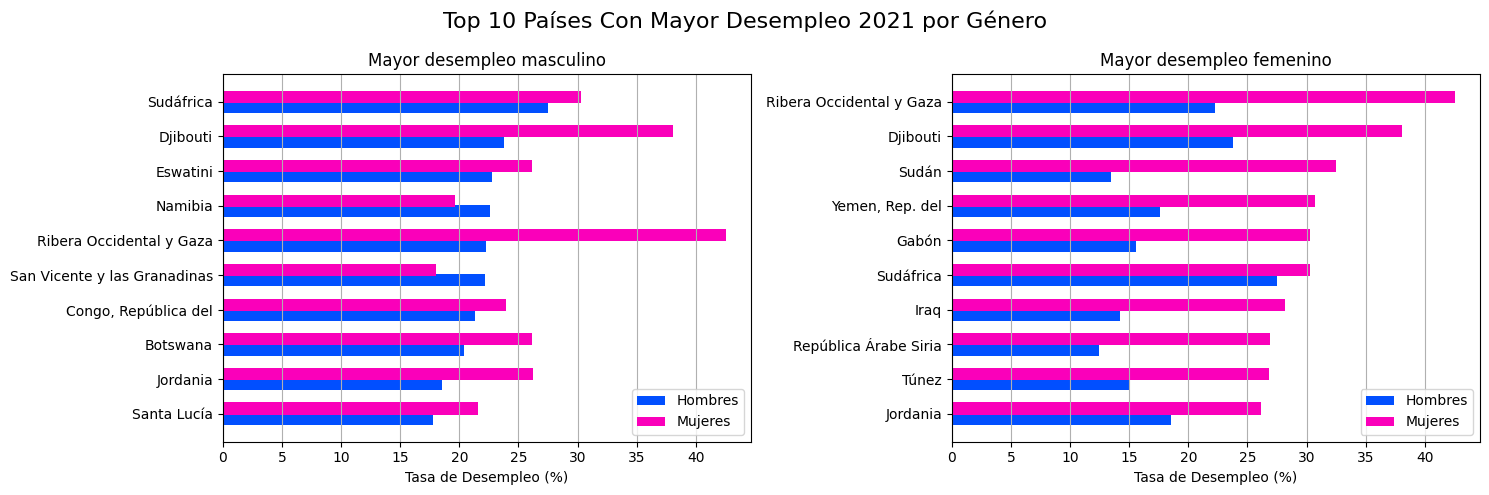

In [ ]:
index = np.arange(10)
bar_height = 0.3
bar_width = 0.35

# Creamos dos plot
#     ax1 -> Paises ordenados con Desemplo masculino
#     ax1 -> Paises ordenados con Desemplo femenino
#    subplots(1(Fila),2(Columnas))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Desempleo Masculino
bar1 = ax1.barh(index - bar_height/2, desempleo_h_ordenado_h, bar_width, color='#014FFF', label='Hombres')
bar2 = ax1.barh(index + bar_height/2, desempleo_m_ordenado_h, bar_width, color='#FA00BA', label='Mujeres')

ax1.set_xlabel('Tasa de Desempleo (%)')
ax1.set_title('Mayor desempleo masculino')
ax1.legend()
ax1.set_yticks(index)
ax1.set_yticklabels(pais_ordenado_h)
ax1.grid(axis='x')

# Desempleo Femenino
bar3 = ax2.barh(index - bar_height/2, desempleo_h_ordenado, bar_width, color='#014FFF', label='Hombres')
bar4 = ax2.barh(index + bar_height/2, desempleo_m_ordenado, bar_width, color='#FA00BA', label='Mujeres')

ax2.set_xlabel('Tasa de Desempleo (%)')
ax2.set_title('Mayor desempleo femenino')
ax2.legend()
ax2.set_yticks(index)
ax2.set_yticklabels(pais_ordenado)
ax2.grid(axis='x')

fig.suptitle('Top 10 Países Con Mayor Desempleo 2021 por Género', fontsize=16)
plt.tight_layout()
plt.show()

Los países con mayor tasa de desempleo masculino y femenino se encuentran ubicados mayoritariamente en el continente Africano, el Caribe y en Asia.
En muchos casos son países que se encuentran en vías de desarrollo, que  han tenido numerosos conflictos bélicos, que se encuentran cerrados al exterior o que no tienen una sólida industria ni buenas infraestructuras dejando de lado la veracidad de muchos de los datos proporcionados.

Resulta paradigmático que uno de los países más desarrollados de Africa, como es la República Sudafricana registre las tasas de desempleo masculino más altas del continente y una de las mayores tasas en paro femenino.

Este hecho puede ser debido al enorme flujo migratorio que se ha producido hacia este país en los últimos años y que ha hecho crecer su población pero no su capacidad de ofrecer trabajo. En algunos casos, el alto índice de paro femenino coincide con países que por su religión o cultura no favorecen el empleo de las mujeres como es el caso de los países mayoritariamente islámicos.


## ¿Países con menor desempleo?

In [ ]:
desempleo_h_ordenado, desempleo_m_ordenado, pais_ordenado = ordenar_desempleo_femenino(df_desempleo_h,df_desempleo_m,True)
desempleo_h_ordenado_h, desempleo_m_ordenado_h, pais_ordenado_h = ordenar_desempleo_masculino(df_desempleo_h,df_desempleo_m,True)

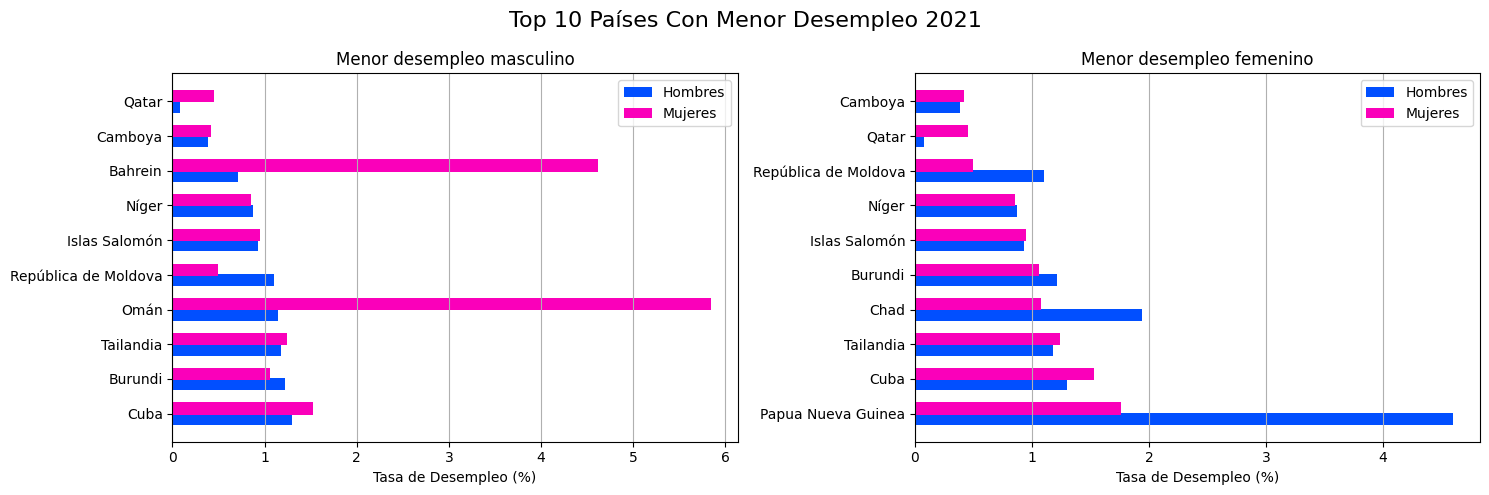

In [ ]:
index = np.arange(10)
bar_height = 0.3
bar_width = 0.35
# Creamos dos plot
#     ax1 -> Paises ordenados con Desemplo masculino
#     ax1 -> Paises ordenados con Desemplo femenino
#    subplots(1(Fila),2(Columnas))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Desempleo Masculino
bar1 = ax1.barh(index - bar_height/2, desempleo_h_ordenado_h, bar_width, color='#014FFF', label='Hombres')
bar2 = ax1.barh(index + bar_height/2, desempleo_m_ordenado_h, bar_width, color='#FA00BA', label='Mujeres')

ax1.set_xlabel('Tasa de Desempleo (%)')
ax1.set_title('Menor desempleo masculino')
ax1.legend()
ax1.set_yticks(index)
ax1.set_yticklabels(pais_ordenado_h)
ax1.grid(axis='x')

# Desempleo Femenino
bar3 = ax2.barh(index - bar_height/2, desempleo_h_ordenado, bar_width, color='#014FFF', label='Hombres')
bar4 = ax2.barh(index + bar_height/2, desempleo_m_ordenado, bar_width, color='#FA00BA', label='Mujeres')

ax2.set_xlabel('Tasa de Desempleo (%)')
ax2.set_title('Menor desempleo femenino')
ax2.legend()
ax2.set_yticks(index)
ax2.set_yticklabels(pais_ordenado)
ax2.grid(axis='x')

fig.suptitle('Top 10 Países Con Menor Desempleo 2021', fontsize=16)
plt.tight_layout()
plt.show()

Los países con menor tasa de desempleo se encuentran repartidos por todo el mundo y coinciden con naciones con muy poca población (Islas Salomón, Omán, Qatar, Moldavia o Bahrein), con regímenes dictatoriales que obligan a la población activa a trabajar (Cuba, Níger o Tailandia) o países en vías de desarrollo con una gran superficie y con un crecimiento económico superior al del resto (Papua Nueva Guinea o Camboya).

El país con menor desempleo masculino es Qatar, un país diminuto con grandes reservas petrolíferas.

El segundo es Camboya ya que en los últimos días años ha tenido un enorme despegue económico gracias a la inversión extranjera y a sus yacimientos de petróleo.  

En cuanto al desempleo femenino el país con menor tasa de paro en las mujeres es Camboya, de la que comentamos su enorme desarrollo económico en los últimos años y Qatar en segundo lugar.

# ¿Cómo de desigual es el desempleo en España a lo largo de los años?

In [ ]:
@interact
def show_pais_info(pais=list(df_desempleo_m["Country Name"].unique()),
                   option1=Checkbox(description='Mujeres Adultas'),
                   option2=Checkbox(description='Hombres Adultos'),
                   option3=Checkbox(description='Mujeres Jovenes'),
                   option4=Checkbox(description='Hombres Jovenes')):

  # Filtrar el df por el pais que seleccione
  df_desempleo_m_pais = df_desempleo_m[df_desempleo_m['Country Name'] == pais]
  df_desempleo_h_pais = df_desempleo_h[df_desempleo_h['Country Name'] == pais]
  df_desempleo_h_joven_pais = df_desempleo_h_jóvenes[df_desempleo_h_jóvenes['Country Name'] == pais]
  df_desempleo_m_joven_pais = df_desempleo_m_jóvenes[df_desempleo_m_jóvenes['Country Name'] == pais]

  # Tenemos que restructurar las columnas
  df_desempleo_h_pais = df_desempleo_h_pais.melt(id_vars=['Country Name'], var_name='Año', value_name='Cantidad')
  df_desempleo_m_pais = df_desempleo_m_pais.melt(id_vars=['Country Name'], var_name='Año', value_name='Cantidad')
  df_desempleo_h_joven_pais = df_desempleo_h_joven_pais.melt(id_vars=['Country Name'], var_name='Año', value_name='Cantidad')
  df_desempleo_m_joven_pais = df_desempleo_m_joven_pais.melt(id_vars=['Country Name'], var_name='Año', value_name='Cantidad')

  #Realizamos el grafico
  plt.figure(figsize=(18, 6))

  #Dependiendo la opcion seleccionada mostraremos un plt u otro
  if option3 == False:
    Mujeres_jovenes =plt.bar(df_desempleo_m_joven_pais['Año'], df_desempleo_m_joven_pais["Cantidad"], color='#FF73E4', edgecolor='black',label="Mujeres Jovenes")
  if option4 == False:
    Hombres_jovenes = plt.bar(df_desempleo_h_joven_pais['Año'], df_desempleo_h_joven_pais["Cantidad"], color='#01B4FF', edgecolor='black',label="Hombres Jovenes")
  if option1 == False:
    Mujeres_adultas = plt.bar(df_desempleo_m_pais['Año'], df_desempleo_m_pais["Cantidad"], color='#FA00BA', edgecolor='black',label="Mujeres Adultas")
  if option2 == False:
    Hombres_adultos = plt.bar(df_desempleo_h_pais['Año'], df_desempleo_h_pais["Cantidad"], color='#014FFF', edgecolor='black' ,label="Hombres Adultos")

  plt.xlabel('Año')
  plt.ylabel('(%)')
  plt.title("Evolución Desempleo en "+str(pais)+" por Género y Edad")

  plt.grid(axis='y')
  plt.legend()
  plt.show()

interactive(children=(Dropdown(description='pais', options=('Afganistán', 'Angola', 'Albania', 'El mundo árabe…

La evolución del desempleo en España por género y edad pone de manifiesto como el paro masculino y femenino, tanto de jóvenes como de personas adultas ha sufrido numerosos cambios producidos a lo largo de los años 1991 a 2021 y que han venido principalmente condicionados por la estabilidad económica mundial así como en los cambios producidos en los últimos años en cuanto a la presencia de la mujer en la vida pública y el avance en sus derechos.

El paro masculino adulto ha sufrido grandes altibajos en relación a las crisis económicas. Así, la crisis de los años 90 hizo crecer enormemente el paro masculino hasta el año 2000 en el que se produjeron sus índices más bajos. Por el contrario, la crisis de 2010-2017 hizo que España alcanzara las cotas más altas de desempleo de todos los tiempos.
En el caso del paro femenino, éste ha ido reduciéndose exponencialmente hasta llegar al año 2012, en el que el desempleo de las mujeres está en un mínimo. La crisis económica siguiente, supuso un crecimiento en el porcentaje de mujeres desempleadas, pero siempre por debajo de la tasa masculina.
Se puede afirmar que mientras que el desempleo masculino ha sufrido enormes alzas y bajas en los años del análisis, el paro femenino se ha visto menos afectado por los cambios ya que durante esos años se han incorporado al mercado laboral muchas mujeres.

En cuanto al paro juvenil, se puede establecer un paralelismo del paro masculino adulto con el paro masculino juvenil ya que ambos han ido creciendo y decreciendo en consonancia con las crisis económicas y la estabilidad del país.
Así mismo, el paro juvenil femenino ha sufrido más que ningún otro los vaivenes políticos, sociales y económicos teniendo una enorme tasa de paro, superior a la de los varones.

Por el contrario, el paro femenino adulto ha sido el que mejor se ha comportado a lo largo de los años, teniendo una tendencia en los últimos años a estabilizarse respecto el resto.

Así, podemos afirmar que durante los 30 años analizados el desempleo ha ido creciendo o disminuyendo con relación a la economía con la excepción del desempleo adulto femenino que ha sido el que menos ha sufrido los cambios.

Independientemente de ello, la tasa general de desempleo en España ha sido y sigue siendo una de las más altas de los países desarrollados y muy superior a la de los países de su entorno europeo.
Una de las cuestiones más llamativas es el hecho de que durante tres años desde 2012 hasta el 2014 hubiera una tasa superior al 50% de gente joven sin empleo tanto masculino como femenino.





## ¿Cómo se reparte el desempelo por género en los diferentes países?


In [ ]:
def preprocesamiento_df_pie(df_desempleo_m_pais,df_desempleo_h_pais,df_desempleo_h_joven_pais,df_desempleo_m_joven_pais,ano):

  # Tenemos que restructurar las columnas
  df_desempleo_h_pais = df_desempleo_h_pais.melt(id_vars=['Country Name'], var_name='Año', value_name='Hombres')
  df_desempleo_m_pais = df_desempleo_m_pais.melt(id_vars=['Country Name'], var_name='Año', value_name='Mujeres')
  df_desempleo_h_joven_pais = df_desempleo_h_joven_pais.melt(id_vars=['Country Name'], var_name='Año', value_name='Hombres_Jovenes')
  df_desempleo_m_joven_pais = df_desempleo_m_joven_pais.melt(id_vars=['Country Name'], var_name='Año', value_name='Mujeres_Jovenes')
  #Eliminamos Columnas para no dar problemas en merge
  df_desempleo_m_pais = df_desempleo_m_pais.drop(columns=['Country Name'])
  df_desempleo_m_joven_pais = df_desempleo_m_joven_pais.drop(columns=['Country Name'])
  df_desempleo_h_joven_pais = df_desempleo_h_joven_pais.drop(columns=['Country Name'])
  #Unimos los df
  df_unido = pd.merge(df_desempleo_h_pais, df_desempleo_m_pais, on='Año')
  df_unido = pd.merge(df_unido, df_desempleo_m_joven_pais, on='Año')
  df_unido = pd.merge(df_unido, df_desempleo_h_joven_pais, on='Año')
  #Filtramos Año
  df_unido = df_unido[(df_unido['Año'] == str(ano))]
  df_unido = df_unido.drop(columns=['Country Name'])
  df_unido = df_unido.drop(columns=['Año'])
  # Transponemos el df
  df_transpuesto = df_unido.transpose()
  df_transpuesto.reset_index(inplace=True)
  # Renombrar las columnas
  df_transpuesto.columns = ['Categoria', 'Cantidad']

  return df_transpuesto

In [ ]:
@interact
def comparation_pais_info(pais=list(df_desempleo_m["Country Name"].unique()),
                          ano=list([i for i in range(1991, 2022)]),
                          pais_2=list(df_desempleo_m["Country Name"].unique()),
                          ano_2=list([i for i in range(1991, 2022)])):

  #Filtrar el df por el pais que seleccione y Preprocesamos
  df_transpuesto = preprocesamiento_df_pie(df_desempleo_m[df_desempleo_m['Country Name'] == pais],
                                           df_desempleo_h[df_desempleo_h['Country Name'] == pais],
                                           df_desempleo_h_jóvenes[df_desempleo_h_jóvenes['Country Name'] == pais],
                                           df_desempleo_m_jóvenes[df_desempleo_m_jóvenes['Country Name'] == pais],
                                           ano)
  df_transpuesto_2 = preprocesamiento_df_pie(df_desempleo_m[df_desempleo_m['Country Name'] == pais_2],
                                           df_desempleo_h[df_desempleo_h['Country Name'] == pais_2],
                                           df_desempleo_h_jóvenes[df_desempleo_h_jóvenes['Country Name'] == pais_2],
                                           df_desempleo_m_jóvenes[df_desempleo_m_jóvenes['Country Name'] == pais_2],
                                           ano_2)

  #Asignamos colores dependiendo de la Categoria que tienen
  colores_por_categoria = {"Hombres":"#014FFF",
                           "Mujeres":"#FA00BA",
                           "Hombres_Jovenes":"#01B4FF",
                           "Mujeres_Jovenes":"#FF73E4"}
  colors = [colores_por_categoria[c] for c in df_transpuesto["Categoria"]]

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

  #Pais primero
  ax1.pie(df_transpuesto["Cantidad"],
    labels=df_transpuesto["Categoria"],
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=colors)

  ax1.set_title("Evolución Desempleo en "+str(pais)+" en "+str(ano))

  #Pais segundo
  ax2.pie(df_transpuesto_2["Cantidad"],
    labels=df_transpuesto_2["Categoria"],
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=colors)

  ax2.set_title("Evolución Desempleo en "+str(pais_2)+" en "+str(ano_2))

  fig.suptitle('Comparación desempleo de Países por Género ', fontsize=15)
  plt.show()

interactive(children=(Dropdown(description='pais', options=('Afganistán', 'Angola', 'Albania', 'El mundo árabe…

Dado que en la anterior práctica expuse el caso de Brexit de Reino Unido en esta práctida de nuevo hago una comparación con el mismo.

En este caso vemos la comparativa de los gráficos de España y Reino Unido en la evolución del desempleo en el año 2021 se desprende que el desempleo en hombres resulta muy similar en ambos países, mientras que el desempleo juvenil masculino resultan mucho mayor en Reino Unido que en España, con más de 6 puntos de diferencia.

Así mismo, el desempleo de las mujeres  resulta superior en España en más de un 3,5%. Para finalizar el desempleo en las mujeres jóvenes resulta superior en España en casi un 4%.

Como resultado final, se puede afirmar que en líneas generales el desempleo femenino en España es ligeramente superior al de Reino Unido, mientras que por el contrario, el desempleo masculino es superior en Reino Unido.

Así, las mujeres tienen más probabilidades de encontrar empleo en Gran Bretaña y los hombres tendrían más posibilidades en España.
